### Classification Models implementation on Census Income Dataset

#### EDA, FE
- Data processing
- Graphical Analysis
- Statistical Analysis

#### Implemented Models
- Decision Tree Classifier
- Random Forest Classifier
- Bagging Classifier
- Extra Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [6]:
column_names = ['age', 'work_class', 'fnlwgt', 'education',
'education_num', 'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'salary']

#### Reading the dataset

In [7]:
df1=pd.read_csv('https://raw.githubusercontent.com/BraulioV/Census-Income-Data-Set/master/Data/adult.data',header=None,names=column_names)
df1.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df2=pd.read_csv('https://raw.githubusercontent.com/BraulioV/Census-Income-Data-Set/master/Data/adult.test',header=None,names=column_names)
df2.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
df=pd.concat([df1,df2])
df.reset_index(inplace=True)
df.head()

,index,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
df.drop('index',axis=1,inplace=True)
df.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Basic info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   work_class      48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
df.shape

(48842, 15)

In [15]:
df.isnull().sum()

age               0
work_class        0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [16]:
df.duplicated().sum()

52

In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [18]:
df.shape

(48790, 15)

In [20]:
#checking uniqe values
for features in df:
    print(f'{features} has {len(df[features].unique())} unique values')

age has 74 unique values
work_class has 9 unique values
fnlwgt has 28523 unique values
education has 16 unique values
education_num has 16 unique values
marital_status has 7 unique values
occupation has 15 unique values
relationship has 6 unique values
race has 5 unique values
sex has 2 unique values
capital_gain has 123 unique values
capital_loss has 99 unique values
hours_per_week has 96 unique values
native_country has 42 unique values
salary has 2 unique values


In [21]:
#checking the value counts of various features
for features in df:
    print(df[features].value_counts())

36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: work_class, dtype: int64
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
78170      1
279721     1
390867     1
354075     1
350977     1
Name: fnlwgt, Length: 28523, dtype: int64
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64
9     15770

In [23]:
# There are many unknown values marked by '?' in the dataset. We need to replace these wil NaN values and eventually drop these.
df.replace('?',np.nan,inplace=True)
df.isnull().sum()

age                  0
work_class        2795
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2805
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     856
salary               0
dtype: int64

In [25]:
df.dropna(inplace=True)
df.isnull().sum()

age               0
work_class        0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

In [26]:
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
#categorical and numerical features
categorical_features=[features for features in df if df[features].dtype=='object']
categorical_features

['work_class',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'salary']

In [37]:
numerial_features=[features for features in df if df[features].dtype=='int64']
numerial_features

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [39]:
#segrigating continuous and discrete numerial features 
disc_num_features=[features for features in numerial_features if len(df[features].unique())<20]
print(disc_num_features)

['education_num']


In [40]:
cont_num_features=[features for features in numerial_features if features not in disc_num_features]
print(cont_num_features)

['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']


In [41]:
#segrigating continuous and discrete categorical features
disc_categorical_features=[features for features in categorical_features if len(df[features].unique())<20]
print(disc_categorical_features)
cont_categorical_features=[features for features in categorical_features if features not in disc_categorical_features]
print(cont_categorical_features)

['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'salary']
['native_country']


#### Statistical analysis

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45175.0,38.556170,13.215349,17.0,28.0,37.0,47.0,90.0
fnlwgt,45175.0,189738.798450,105652.436515,13492.0,117392.5,178312.0,237903.0,1490400.0
education_num,45175.0,10.119314,2.551740,1.0,9.0,10.0,13.0,16.0
capital_gain,45175.0,1102.576270,7510.249876,0.0,0.0,0.0,0.0,99999.0
capital_loss,45175.0,88.687593,405.156611,0.0,0.0,0.0,0.0,4356.0
hours_per_week,45175.0,40.942512,12.007730,1.0,40.0,40.0,45.0,99.0


In [43]:
#### Covariance
df.cov()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,174.645442,-1.055419e+05,1.256790,7.905245e+03,317.283974,16.123088
fnlwgt,-105541.911167,1.116244e+10,-11320.989477,-3.267375e+06,-186591.279264,-23739.191425
education_num,1.256790,-1.132099e+04,6.511376,2.433507e+03,84.485719,4.487711
capital_gain,7905.245124,-3.267375e+06,2433.507015,5.640385e+07,-97786.999781,7563.346694
capital_loss,317.283974,-1.865913e+05,84.485719,-9.778700e+04,164151.879709,263.398740
hours_per_week,16.123088,-2.373919e+04,4.487711,7.563347e+03,263.398740,144.185587


In [44]:
#### Correlation
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.075590,0.037269,0.079649,0.059258,0.101604
fnlwgt,-0.075590,1.000000,-0.041992,-0.004118,-0.004359,-0.018712
education_num,0.037269,-0.041992,1.000000,0.126982,0.081719,0.146463
capital_gain,0.079649,-0.004118,0.126982,1.000000,-0.032137,0.083868
capital_loss,0.059258,-0.004359,0.081719,-0.032137,1.000000,0.054141
hours_per_week,0.101604,-0.018712,0.146463,0.083868,0.054141,1.000000


#### EDA and FE

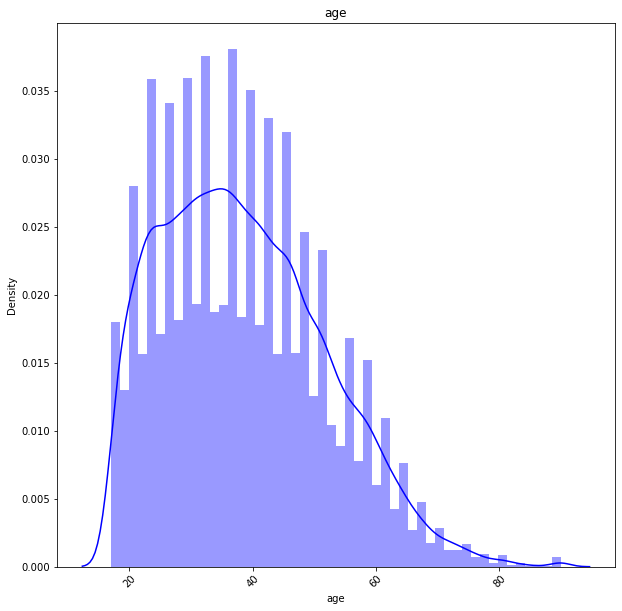

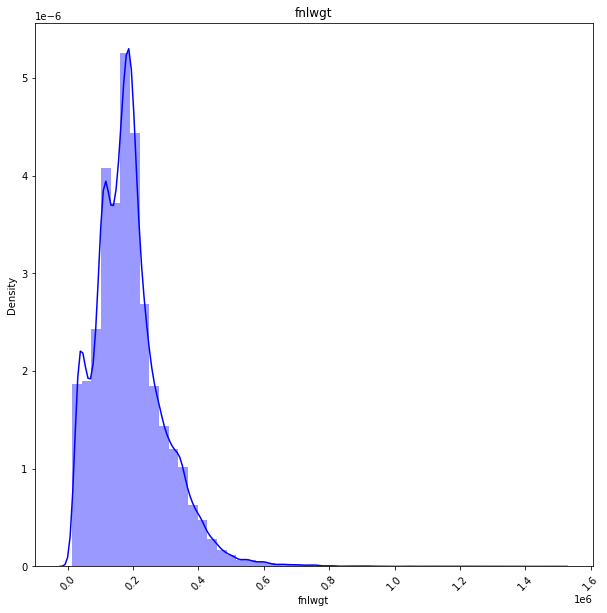

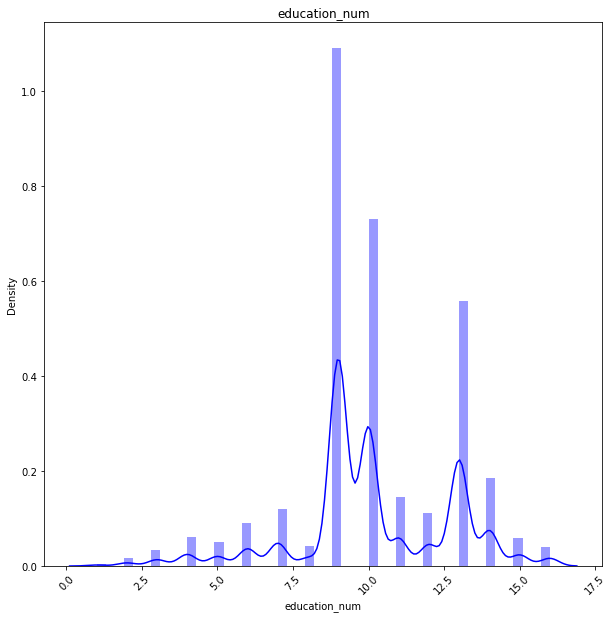

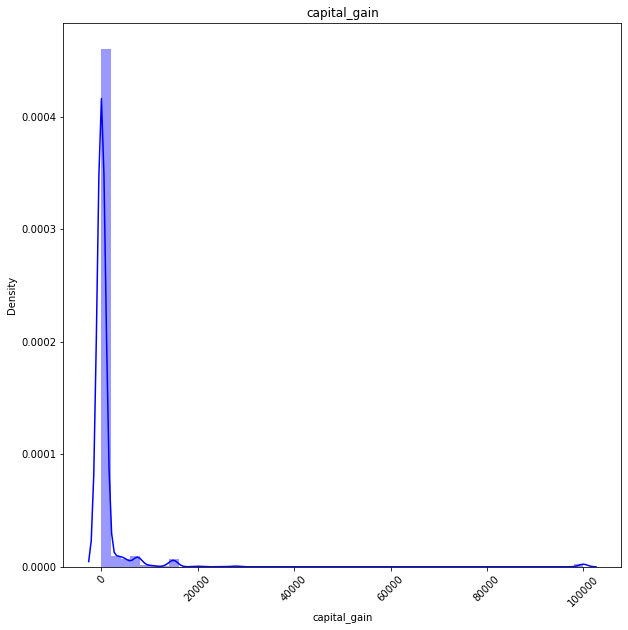

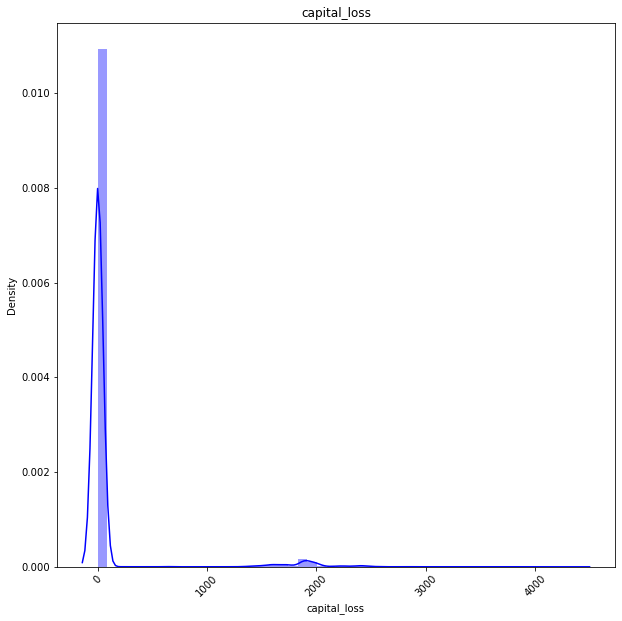

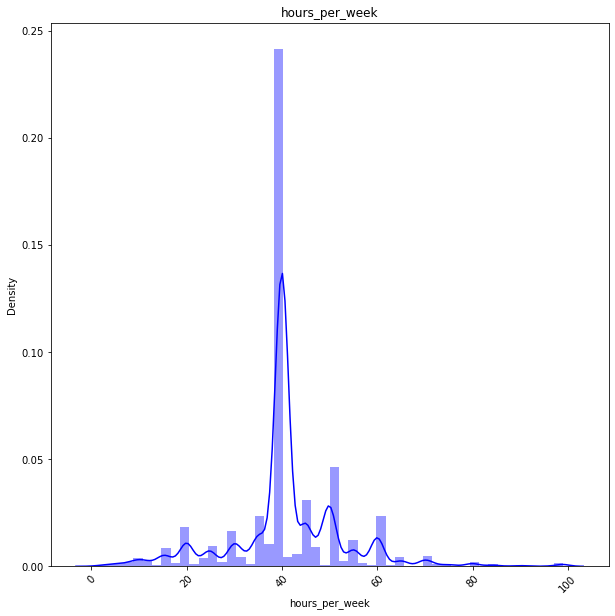

In [59]:
# Univariate graphical analysis of numerical features
for features in numerial_features:
    plt.figure(figsize=(10,10))
    sns.distplot(x=df[features],kde=True,color='blue')
    plt.xlabel(features)
    plt.xticks(rotation=45)
    plt.title(features)
    plt.show()

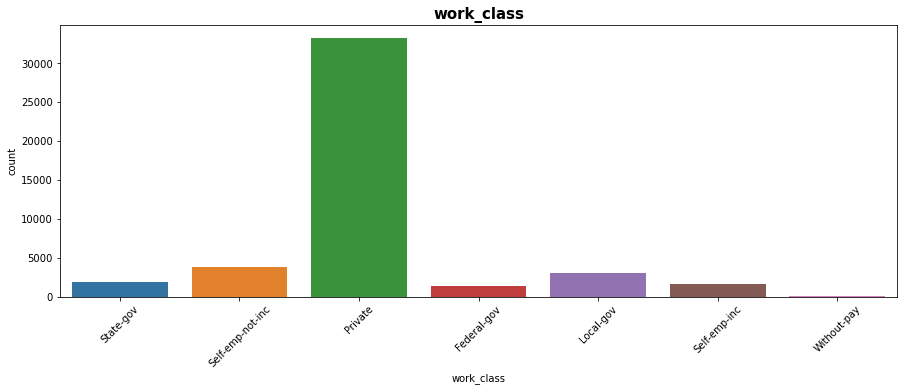

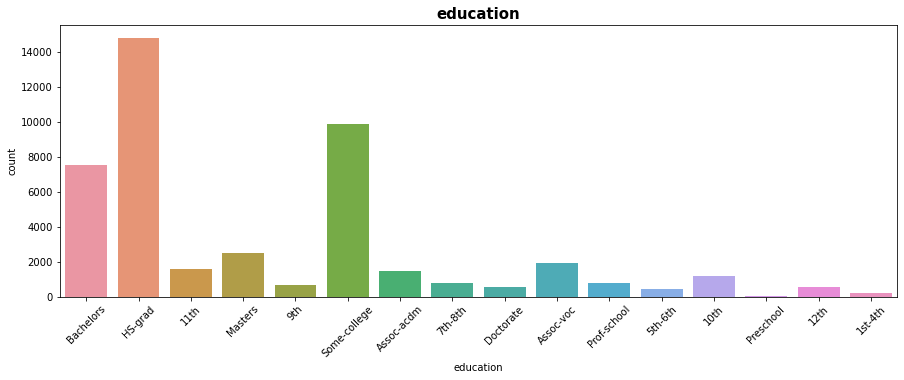

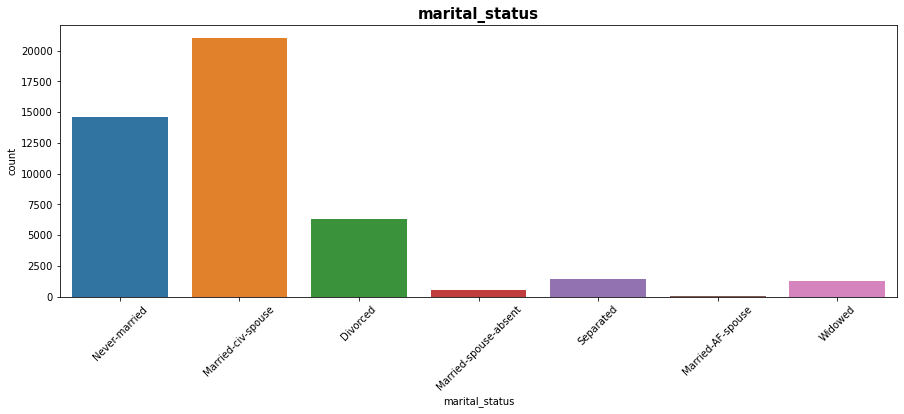

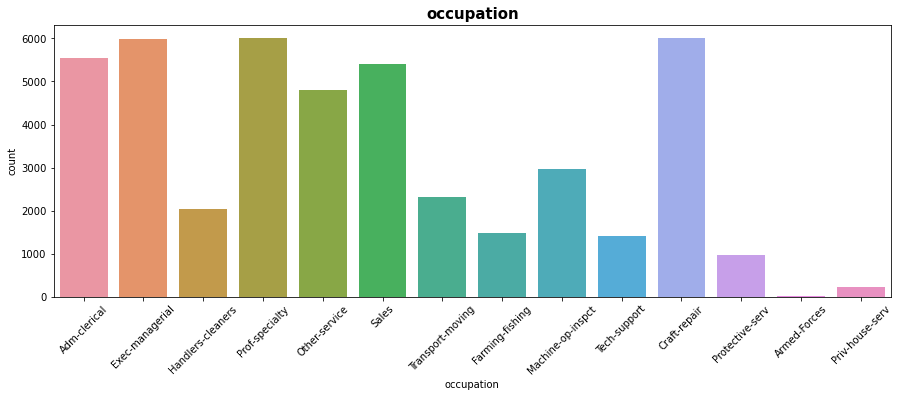

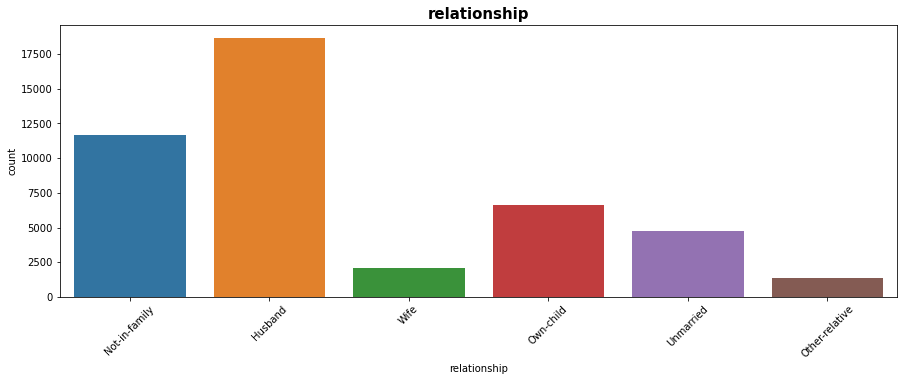

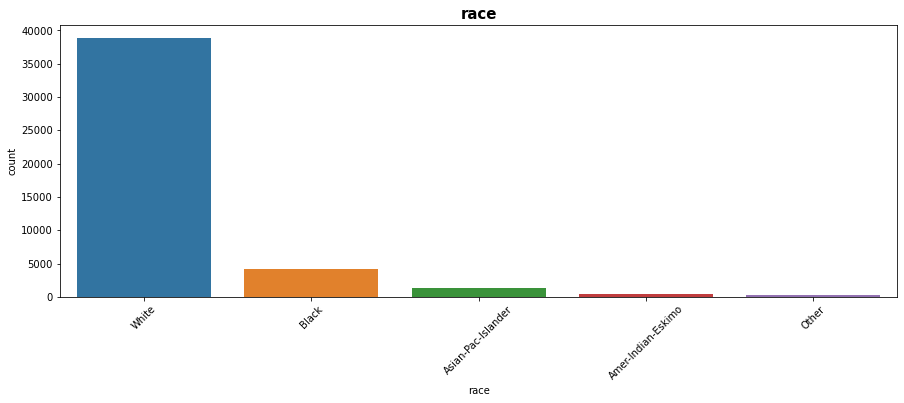

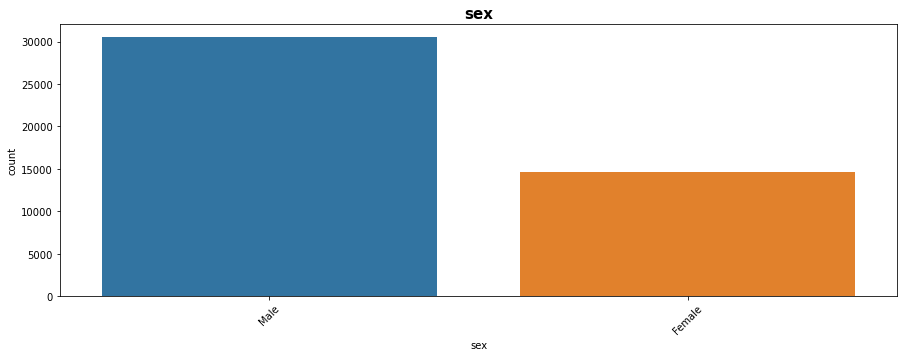

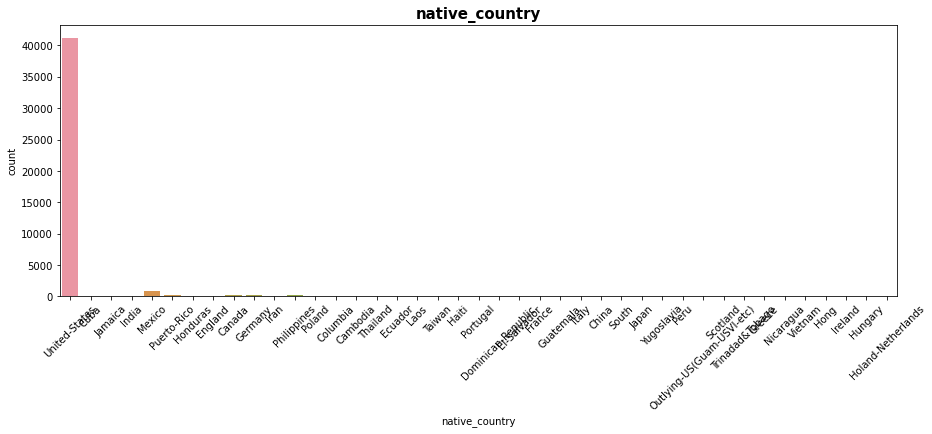

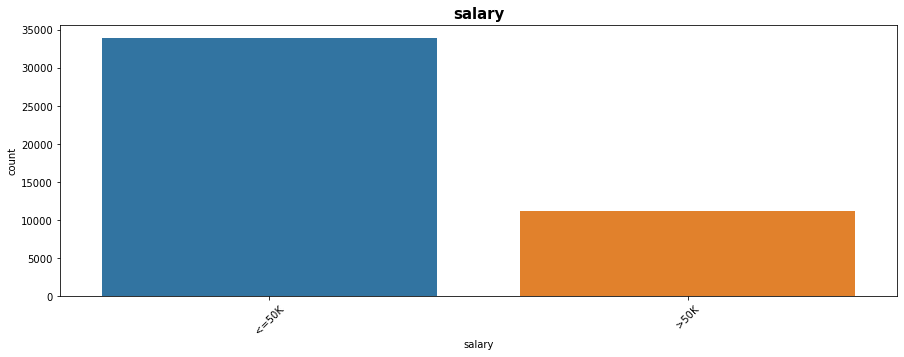

In [60]:
## Checking the count of categorical features
for features in categorical_features:
    plt.figure(figsize=(15,5))
    sns.countplot(data=df,x=df[features])
    plt.xlabel(features)
    plt.xticks(rotation=45)
    plt.title(features, fontsize=15, weight='bold')
    plt.show()

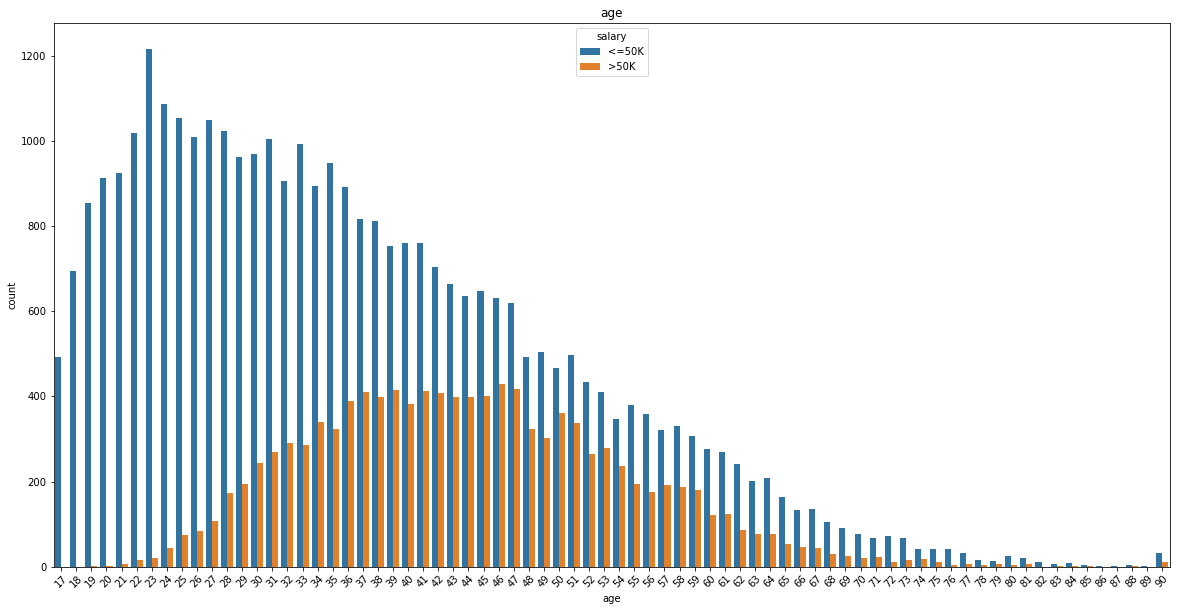

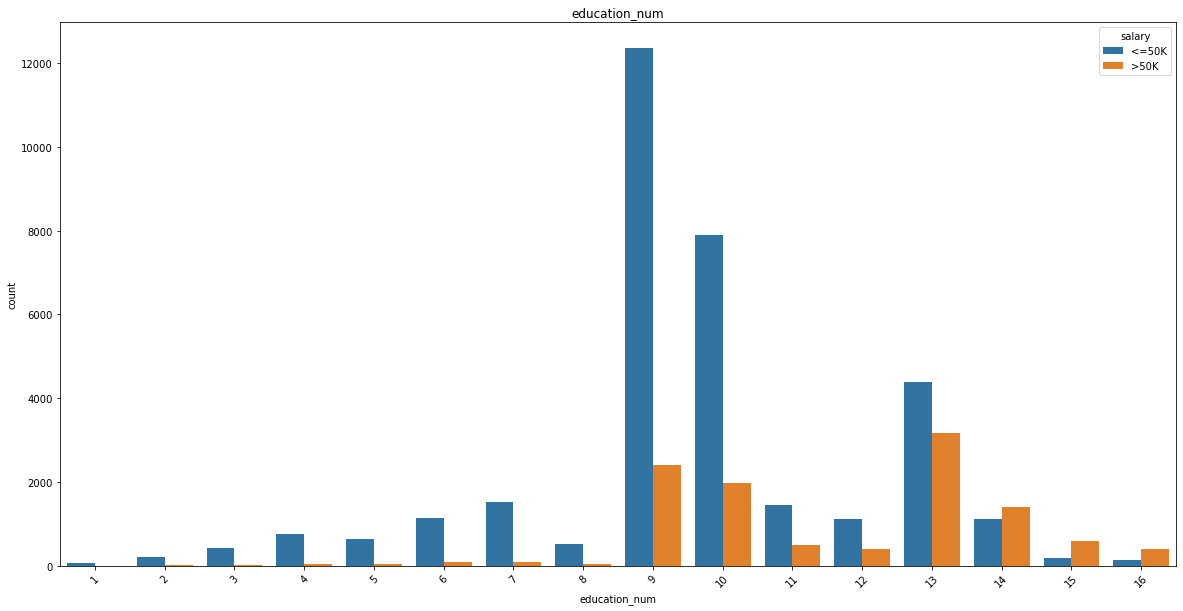

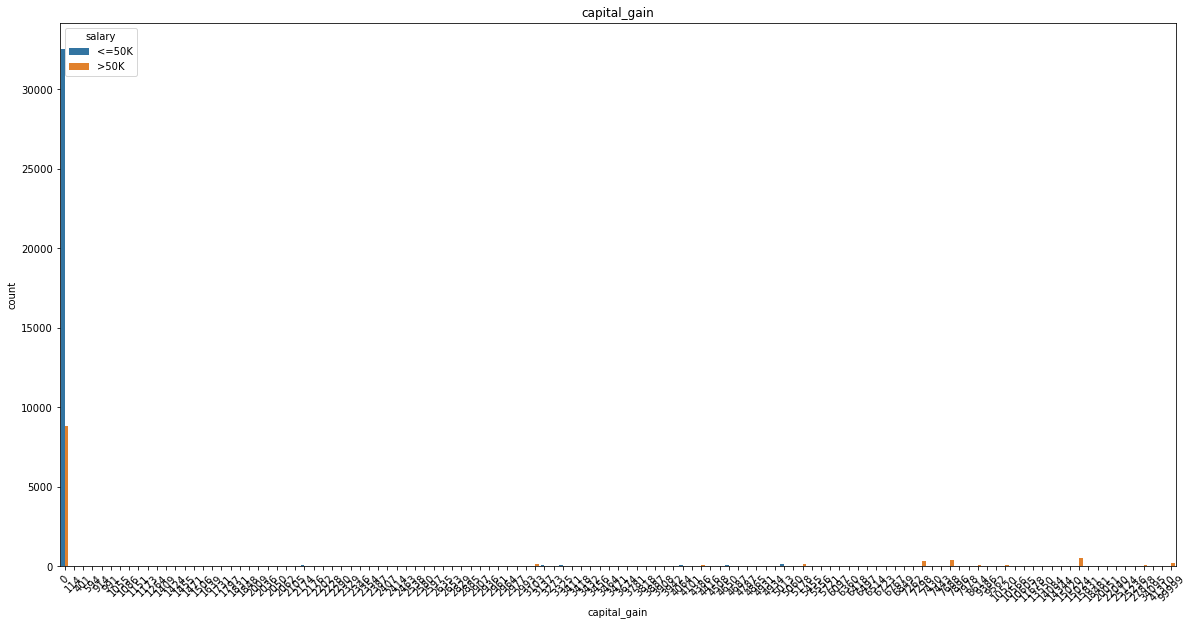

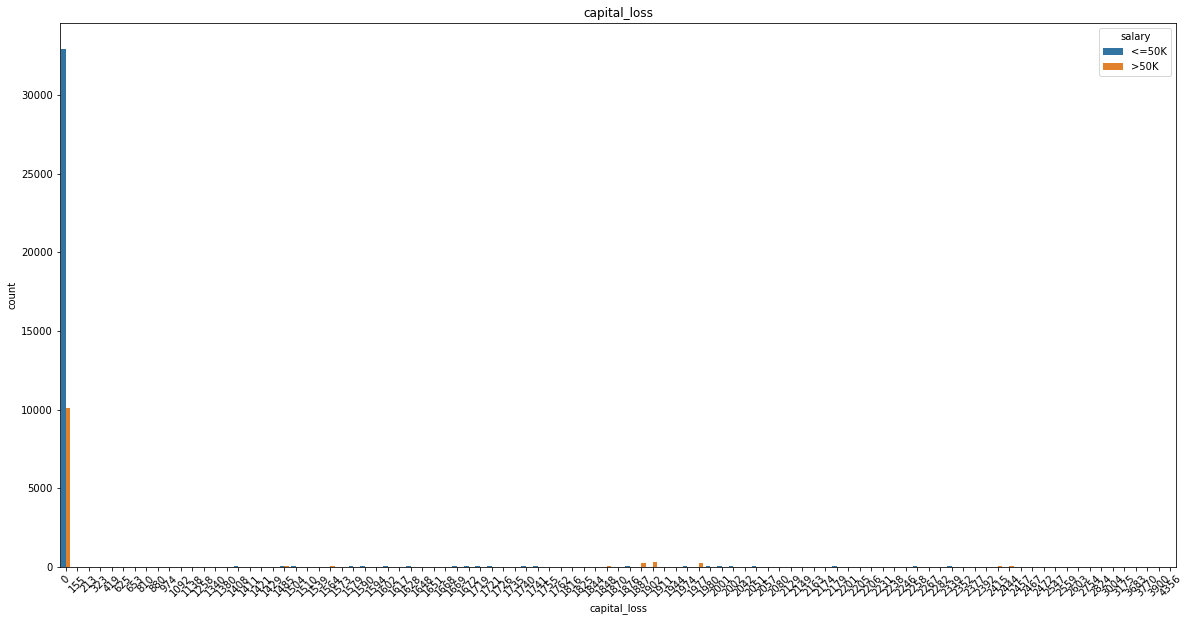

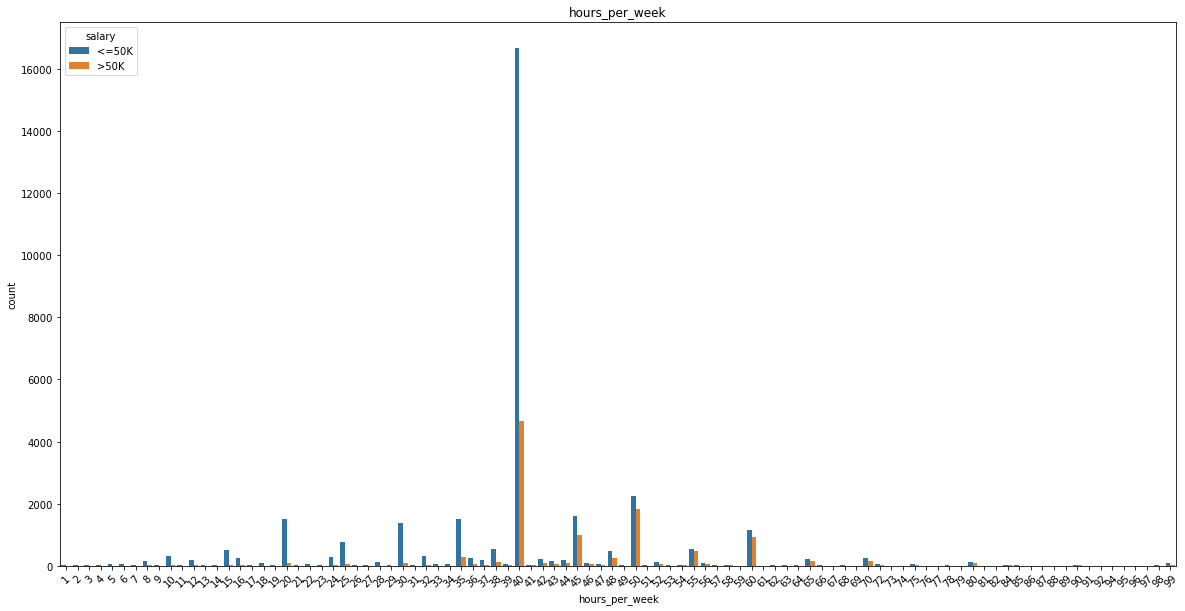

In [69]:
## Comparing numerical features against 'Salary'
for features in numerial_features:
    if features!='fnlwgt':
        plt.figure(figsize=(20,10))
        sns.countplot(x=df[features],hue=df['salary'],data=df)
        plt.xlabel(features)
        plt.xticks(rotation=45)
        plt.title(features)
        plt.show()

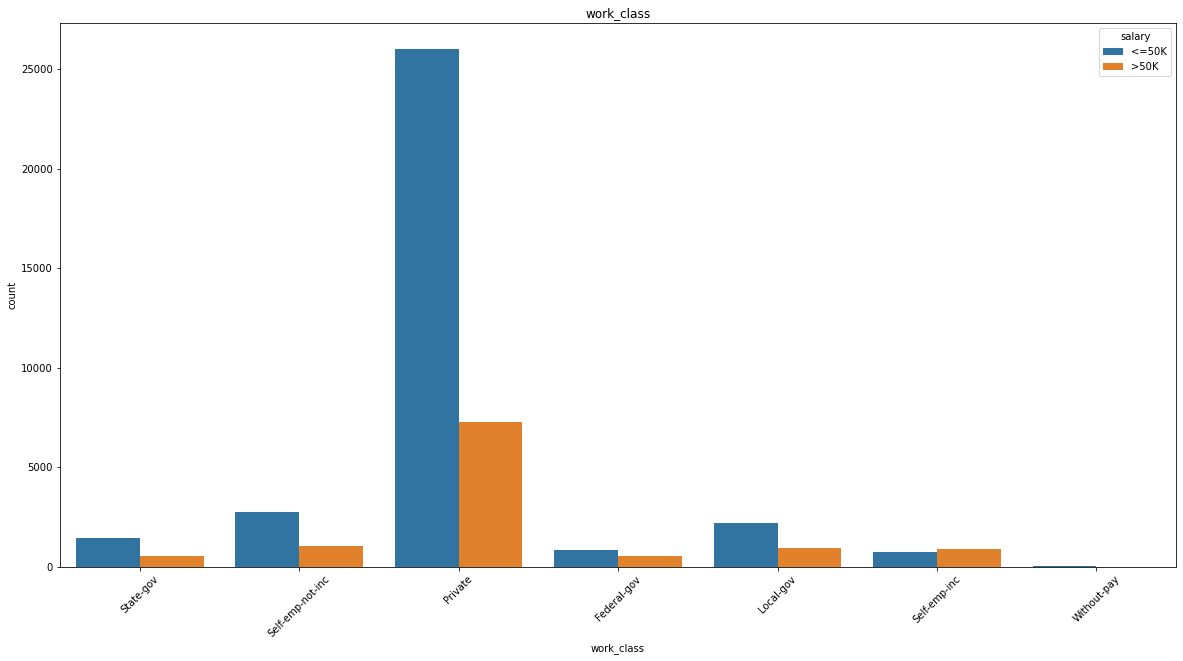

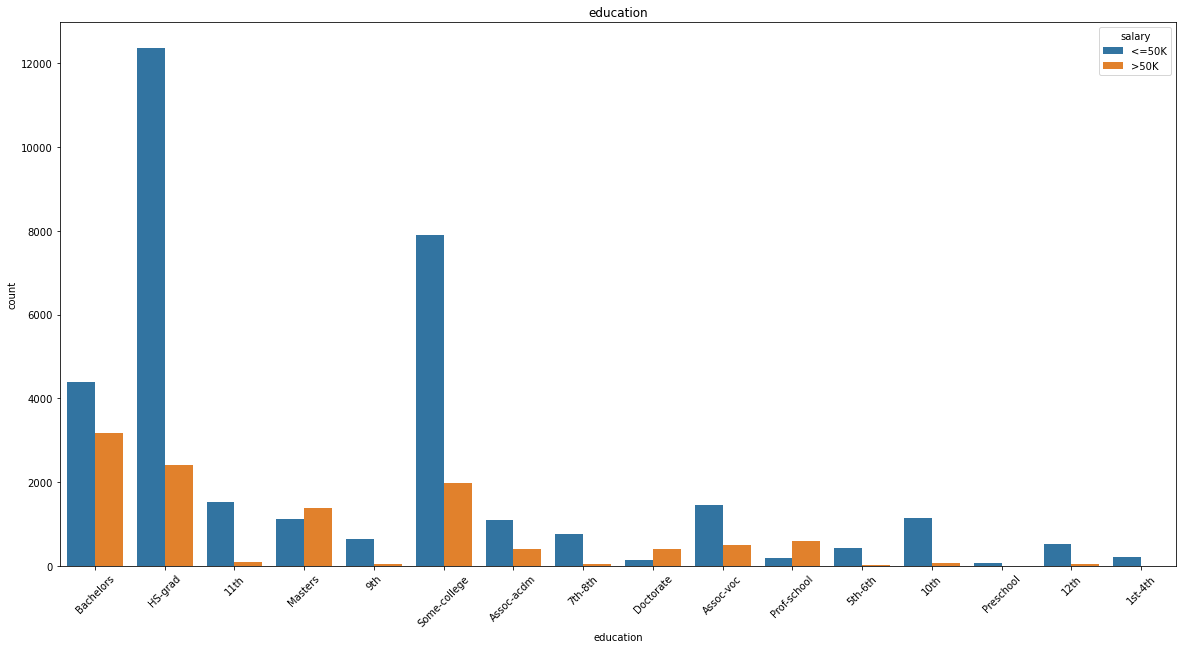

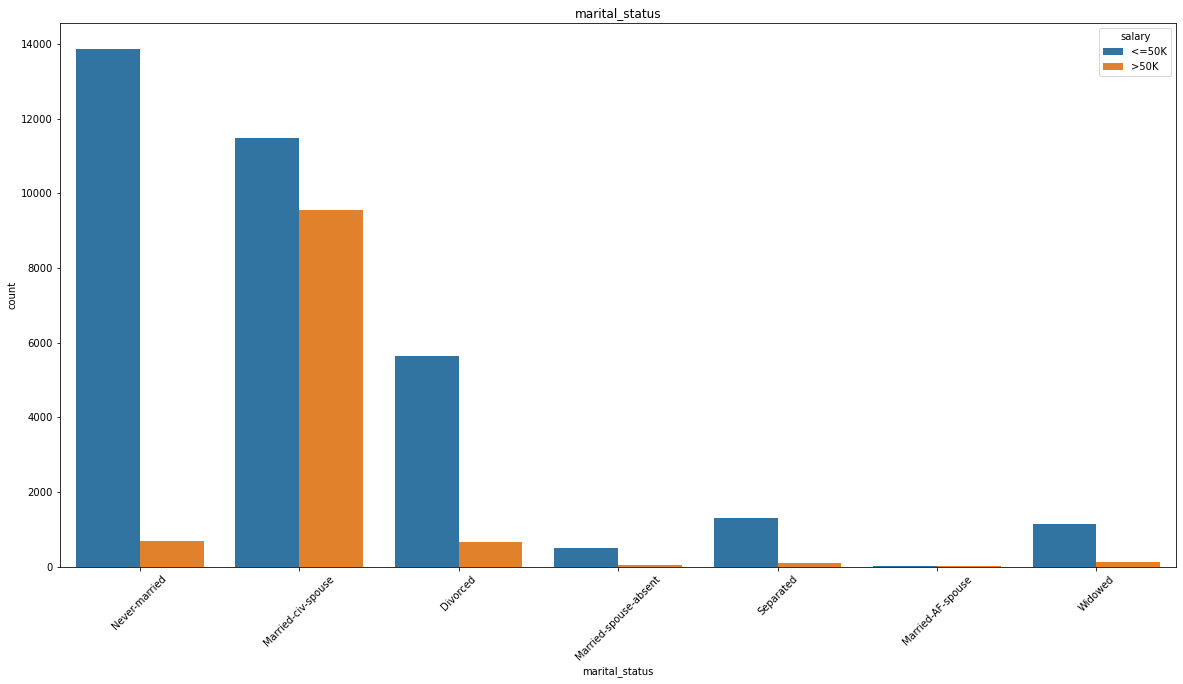

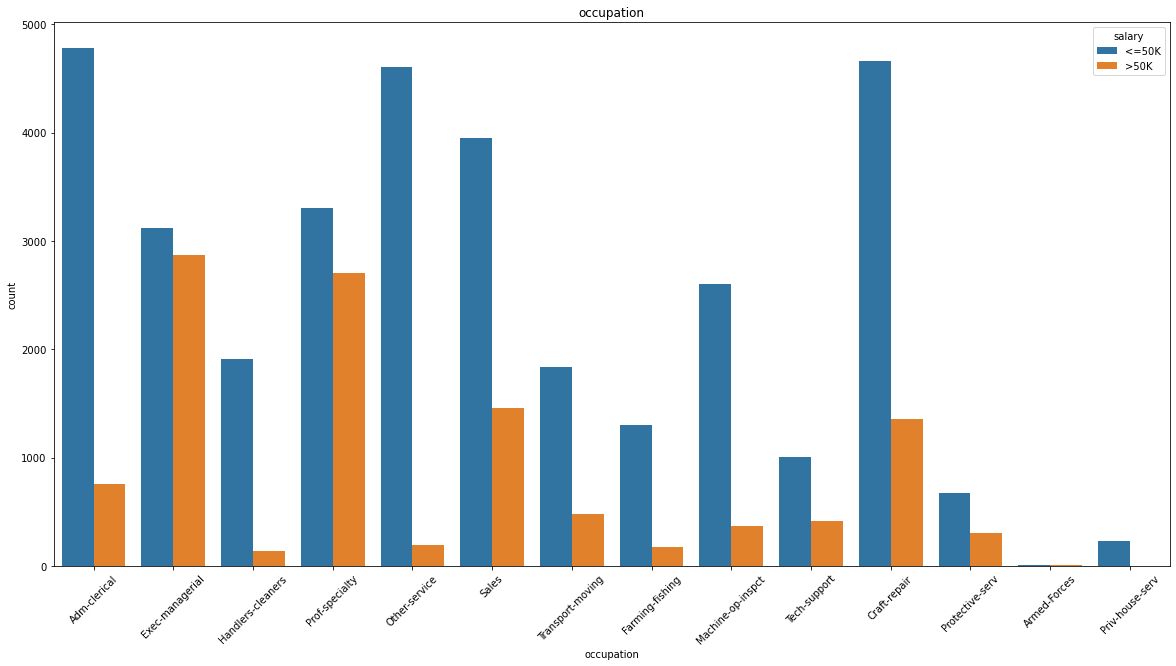

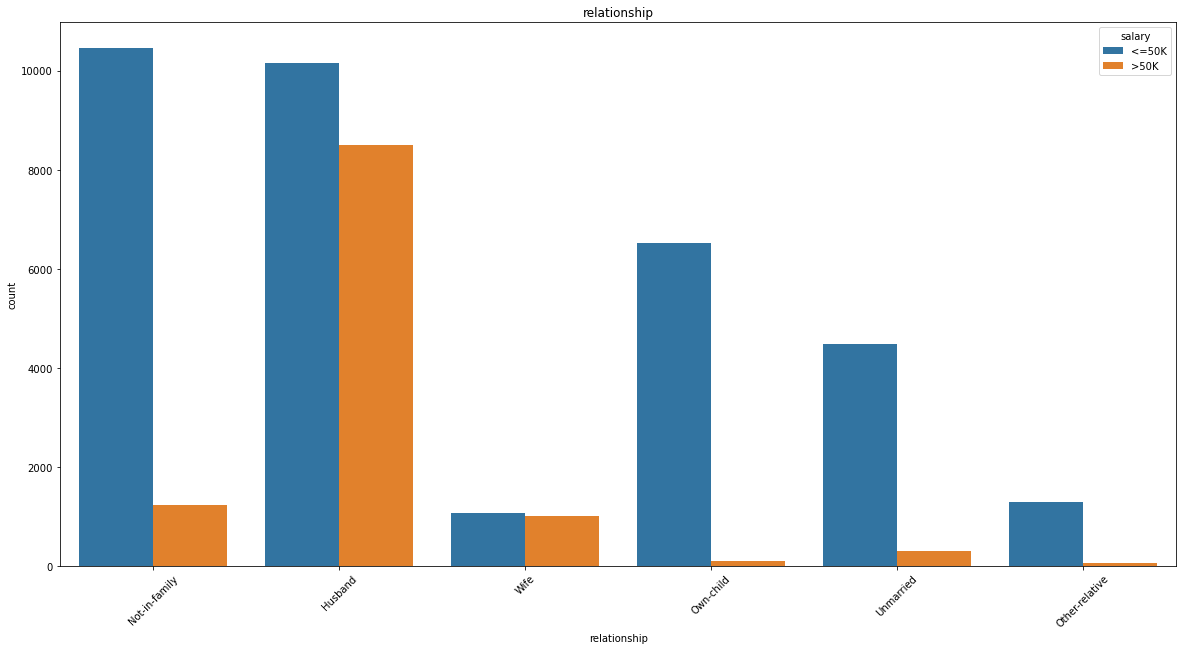

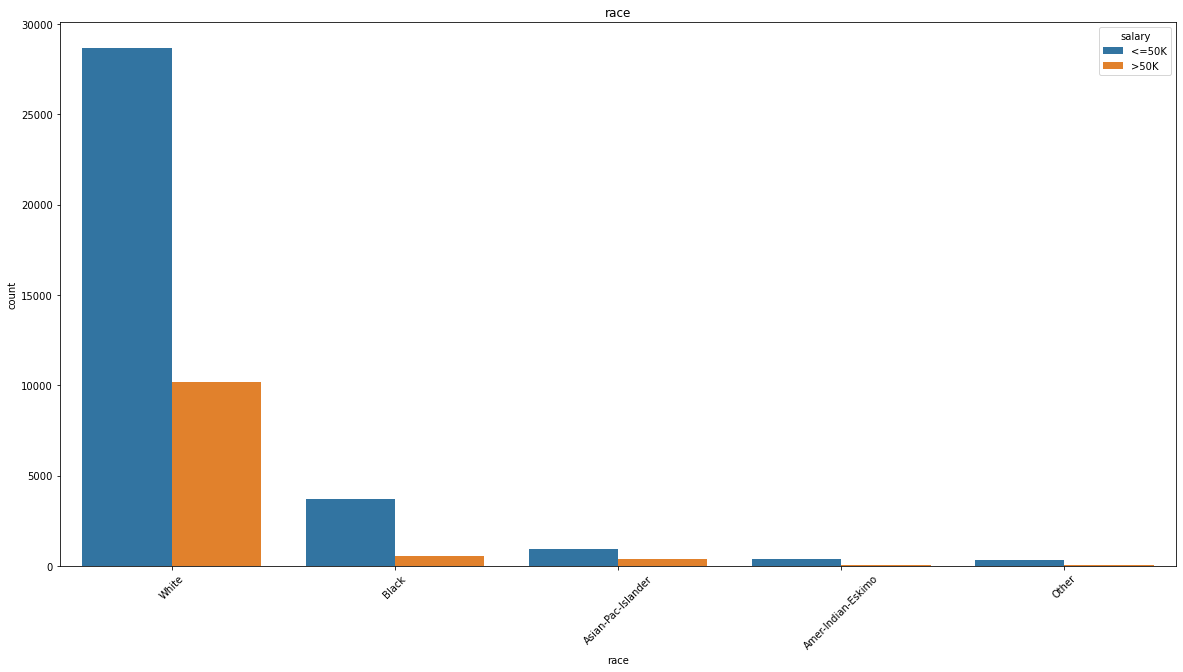

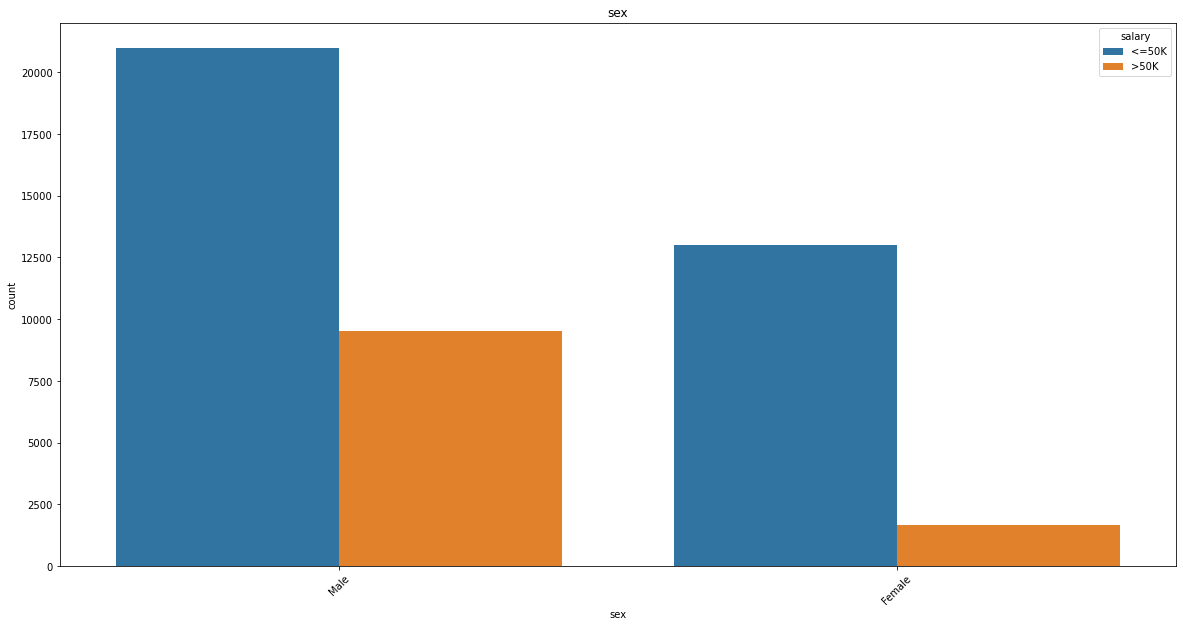

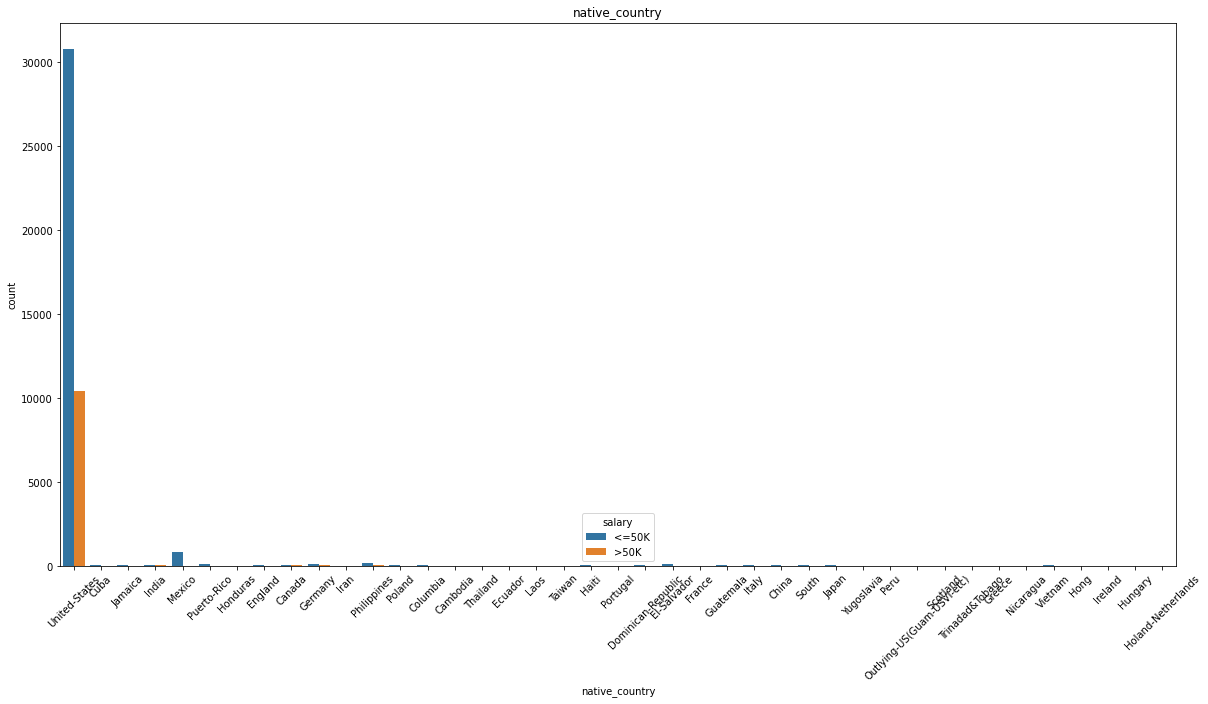

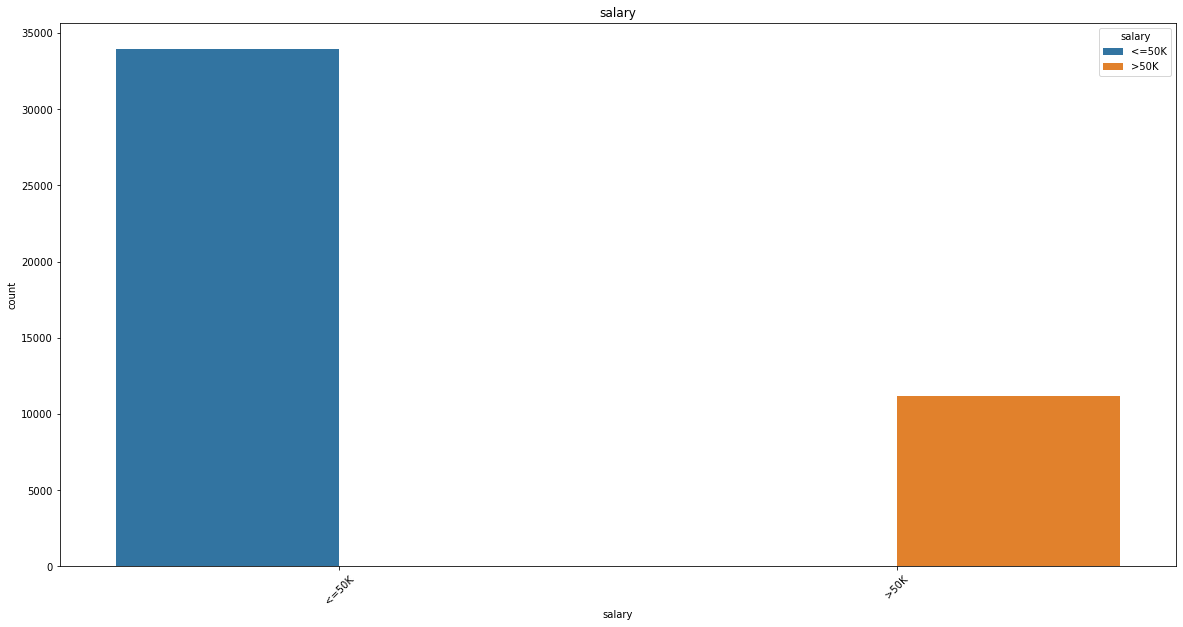

In [71]:
for features in categorical_features:
    plt.figure(figsize=(20,10))
    sns.countplot(x=df[features],hue=df['salary'],data=df)
    plt.xlabel(features)
    plt.xticks(rotation=45)
    plt.title(features)
    plt.show()

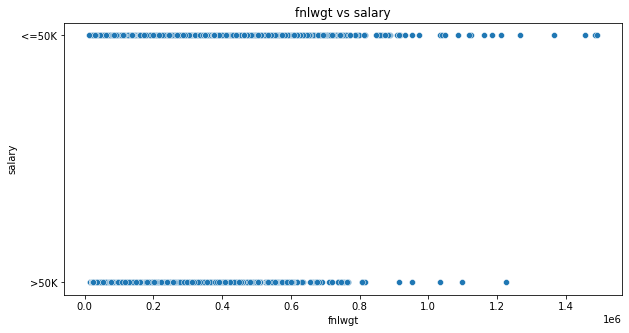

In [79]:
# Comparing fnlwgt feature against salary
plt.figure(figsize=(10,5))
sns.scatterplot(x='fnlwgt',y='salary',data=df)
plt.title('fnlwgt vs salary')
plt.show()

<AxesSubplot:>

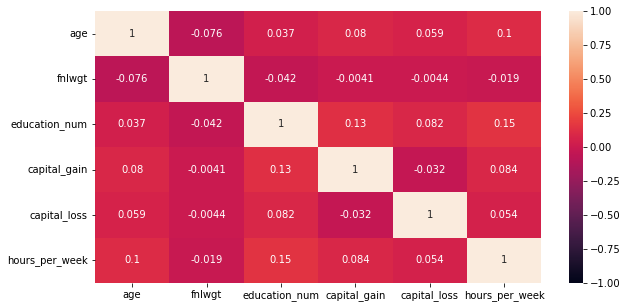

In [84]:
#### Checking Correlation among features using heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df[numerial_features].corr(),vmin=-1,vmax=1,annot=True)

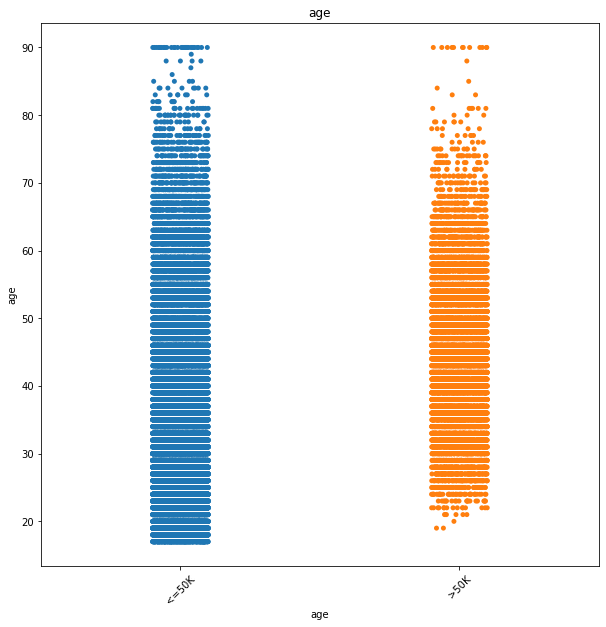

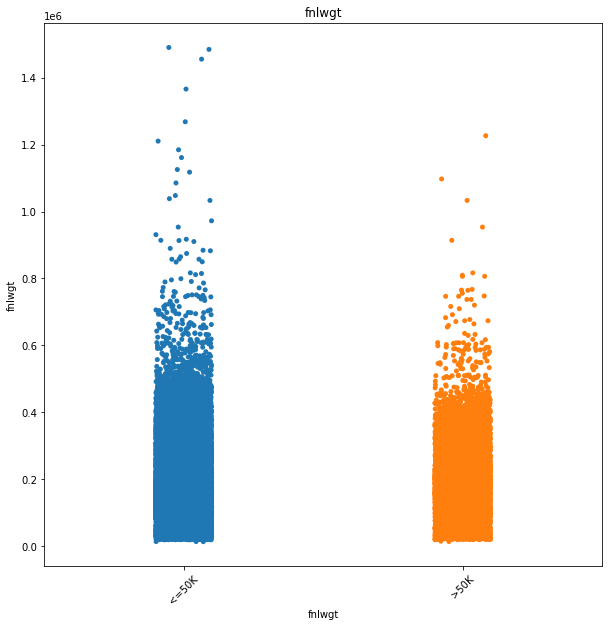

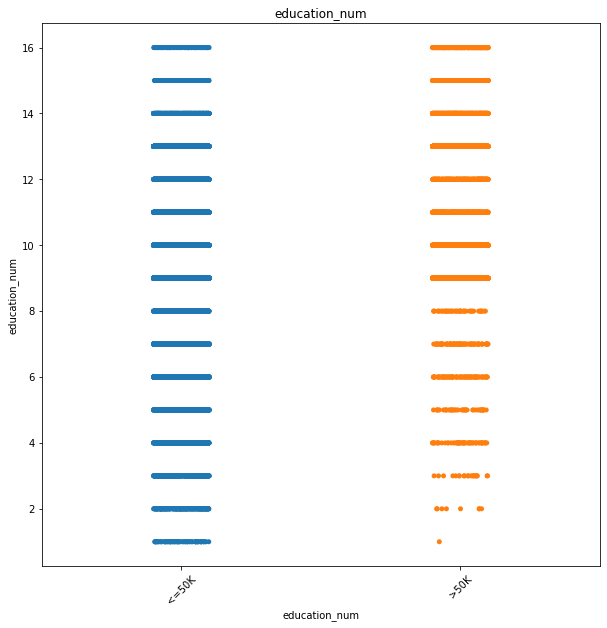

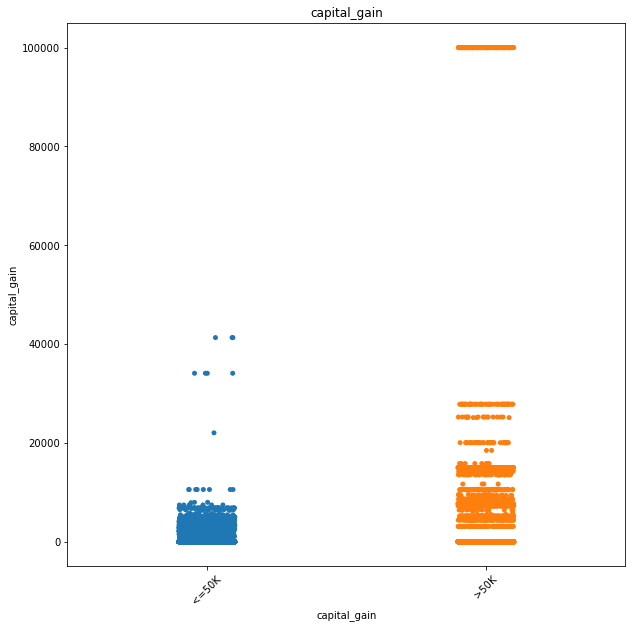

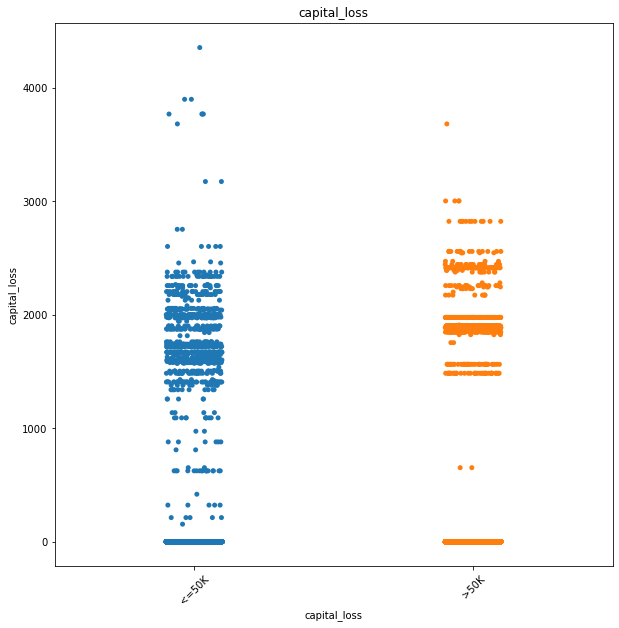

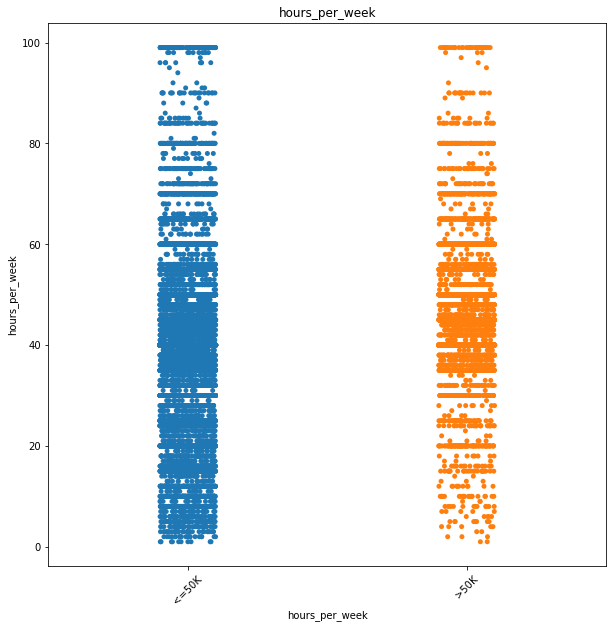

In [88]:
#### Visualising the relations of numerical features with salary with the help of strip plot
for features in numerial_features:
    plt.figure(figsize=(10,10))
    sns.stripplot(x=df['salary'],y=df[features],data=df)
    plt.xlabel(features)
    plt.xticks(rotation=45)
    plt.title(features)
    plt.show()

In [89]:
### Making a copy of data
data=df.copy()

In [90]:
data.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [91]:
#### Dropping unnecessary columns
df.drop(columns=['marital_status','relationship','race'],inplace=True)
df.head()

,age,work_class,fnlwgt,education,education_num,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Handlers-cleaners,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Prof-specialty,Female,0,0,40,Cuba,<=50K


In [92]:
#### Feature encoding
df=pd.get_dummies(df)
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,work_class_Federal-gov,work_class_Local-gov,work_class_Private,work_class_Self-emp-inc,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,salary_<=50K,salary_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [103]:
## Seperating independent and dendent variables
X=data[['age', 'fnlwgt', 'education_num', 'capital_gain',
'capital_loss', 'hours_per_week']]

In [104]:
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [105]:
y=df['salary_>50K']
y

0        0
1        0
2        0
3        0
4        0
        ..
45170    0
45171    0
45172    0
45173    0
45174    1
Name: salary_>50K, Length: 45175, dtype: uint8

In [106]:
print(X.shape,y.shape)

(45175, 6) (45175,)


In [107]:
#Traing-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

#### Model building

In [108]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [109]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [112]:
##accuracy score
from sklearn.metrics import accuracy_score
dtc.score(X_train,y_train)

0.9985132322331252

In [114]:
dtc_predict=dtc.predict(X_test)
accuracy_dtc=accuracy_score(y_test,dtc_predict)
print(f'accuracy score for Decision Tree Classifier model is {round((accuracy_dtc*100),3)}%')

accuracy score for Decision Tree Classifier model is 76.603%


In [115]:
#Roc-auc score
from sklearn.metrics import roc_auc_score
roc_auc_dtc=roc_auc_score(y_test,dtc_predict)
print(f'roc_auc score for Decision Tree Classifier model is {round((roc_auc_dtc*100),3)}%')

roc_auc score for Decision Tree Classifier model is 69.373%


In [116]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat_dtc=confusion_matrix(y_test,dtc_predict)
conf_mat_dtc

array([[9393, 1836],
       [1652, 2027]], dtype=int64)

In [122]:
true_positive = conf_mat_dtc[0][0]
false_positive = conf_mat_dtc[0][1]
false_negative = conf_mat_dtc[1][0]
true_negative = conf_mat_dtc[1][1]
print('True Positive:',true_positive, '\nTrue Negative:',true_negative, '\nFalse Negative:',false_negative, '\nFalse Positive:',false_positive)

True Positive: 9393 
True Negative: 2027 
False Negative: 1652 
False Positive: 1836


In [124]:
#Classification Report
from sklearn.metrics import classification_report
class_report_dtc = classification_report(y_test, dtc_predict)
print(class_report_dtc)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     11229
           1       0.52      0.55      0.54      3679

    accuracy                           0.77     14908
   macro avg       0.69      0.69      0.69     14908
weighted avg       0.77      0.77      0.77     14908



[Text(0.6175595238095238, 0.9285714285714286, 'X[3] <= 5119.0\ngini = 0.374\nsamples = 30267\nvalue = [22744, 7523]'),
 Text(0.38095238095238093, 0.7857142857142857, 'X[2] <= 12.5\ngini = 0.334\nsamples = 28752\nvalue = [22668, 6084]'),
 Text(0.19047619047619047, 0.6428571428571429, 'X[0] <= 29.5\ngini = 0.248\nsamples = 22001\nvalue = [18815, 3186]'),
 Text(0.09523809523809523, 0.5, 'X[4] <= 1805.0\ngini = 0.061\nsamples = 7136\nvalue = [6911, 225]'),
 Text(0.047619047619047616, 0.35714285714285715, 'X[0] <= 24.5\ngini = 0.055\nsamples = 7060\nvalue = [6860, 200]'),
 Text(0.023809523809523808, 0.21428571428571427, 'X[5] <= 42.5\ngini = 0.012\nsamples = 4360\nvalue = [4333, 27]'),
 Text(0.011904761904761904, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.03571428571428571, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.07142857142857142, 0.21428571428571427, 'X[5] <= 55.5\ngini = 0.12\nsamples = 2700\nvalue = [2527, 173]'),
 Text(0.05952380952380952, 0.07142857142857142, '\n  (...)  \n

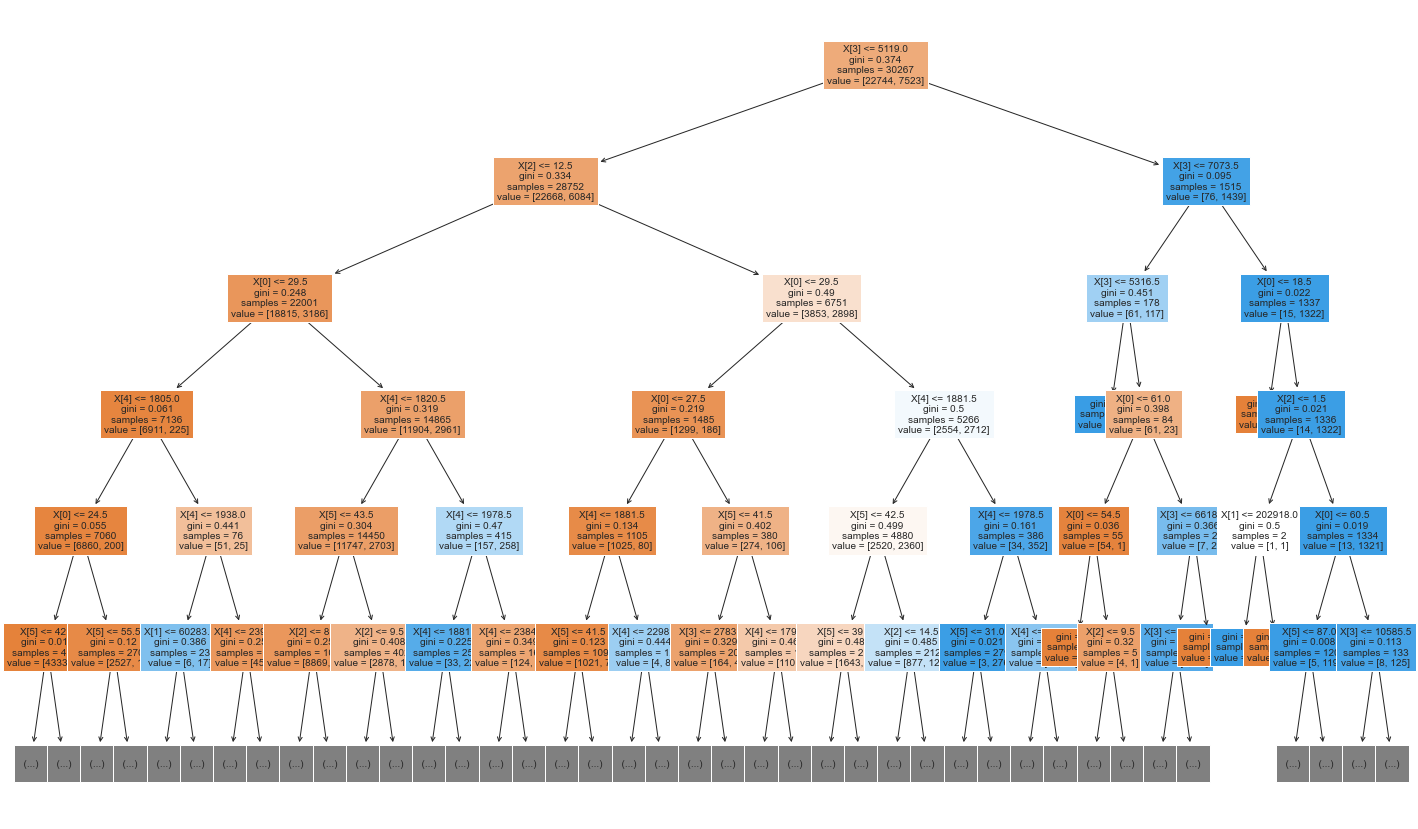

In [126]:
# Plotting decision tree
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
tree.plot_tree(dtc, max_depth=5, filled=True, fontsize=10)

In [128]:
# Hyper Parameter Tuning
grid_params = {
'criterion' : ['gini', 'entropy', 'log_loss'],
'splitter' : ['best', 'random'],
'max_depth' : range(1,10,1),
'min_samples_split' : range(2,10,2),
'min_samples_leaf' : range(1,5,1),
'max_features' : ['auto', 'sqrt', 'log2']
}

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
grid_search=GridSearchCV(estimator=dtc,param_grid=grid_params,verbose=2, n_jobs=-1, cv=3)

In [131]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'splitter': ['best', 'random']},
             verbose=2)

In [132]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'splitter': 'best'}

In [134]:
dtc_best_params=DecisionTreeClassifier(criterion='gini',max_depth= 7,
 max_features= 'sqrt',
 min_samples_leaf= 2,
 min_samples_split= 8,
 splitter= 'best')

In [137]:
#training the best parameter model train data
dtc_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=8)

In [140]:
##predicting the outcome using test data
dtc_best_params_pred=dtc_best_params.predict(X_test)

In [143]:
##checking accuracy of the best parameter dtc model
print(f'training accuracy of the best parameter DTC model is {round(dtc_best_params.score(X_train,y_train)*100,3)}%')
print(f'accuracy score of the best parameter DTC model is {round(accuracy_score(y_test,dtc_best_params_pred)*100,3)}%')

training accuracy of the best parameter DTC model is 82.479%
accuracy score of the best parameter DTC model is 82.077%


In [146]:
#Confusion matrix
conf_mat_dtc_best_param=confusion_matrix(y_test,dtc_best_params_pred)
conf_mat_dtc_best_param

array([[10742,   487],
       [ 2185,  1494]], dtype=int64)

In [147]:
true_positive_bp = conf_mat_dtc[0][0]
false_positive_bp = conf_mat_dtc[0][1]
false_negative_bp = conf_mat_dtc[1][0]
true_negative_bp = conf_mat_dtc[1][1]
print('True Positive:',true_positive_bp, '\nTrue Negative:',true_negative_bp, '\nFalse Negative:',false_negative_bp, '\nFalse Positive:',false_positive_bp)

True Positive: 9393 
True Negative: 2027 
False Negative: 1652 
False Positive: 1836


In [148]:
# Classification Report
class_report_dtc_best_param = classification_report(y_test, dtc_best_params_pred)
print(class_report_dtc_best_param)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     11229
           1       0.75      0.41      0.53      3679

    accuracy                           0.82     14908
   macro avg       0.79      0.68      0.71     14908
weighted avg       0.81      0.82      0.80     14908



[Text(0.529124149659864, 0.9375, 'X[2] <= 12.5\ngini = 0.374\nsamples = 30267\nvalue = [22744, 7523]'),
 Text(0.29549319727891155, 0.8125, 'X[5] <= 43.5\ngini = 0.279\nsamples = 22664\nvalue = [18867, 3797]'),
 Text(0.14710884353741496, 0.6875, 'X[5] <= 35.5\ngini = 0.223\nsamples = 17034\nvalue = [14862, 2172]'),
 Text(0.07312925170068027, 0.5625, 'X[3] <= 7073.5\ngini = 0.088\nsamples = 4856\nvalue = [4631, 225]'),
 Text(0.05102040816326531, 0.4375, 'X[3] <= 3040.0\ngini = 0.072\nsamples = 4807\nvalue = [4627, 180]'),
 Text(0.027210884353741496, 0.3125, 'X[0] <= 28.5\ngini = 0.07\nsamples = 4746\nvalue = [4574, 172]'),
 Text(0.013605442176870748, 0.1875, 'X[0] <= 23.5\ngini = 0.004\nsamples = 2470\nvalue = [2465, 5]'),
 Text(0.006802721088435374, 0.0625, 'gini = 0.001\nsamples = 2038\nvalue = [2037, 1]'),
 Text(0.02040816326530612, 0.0625, 'gini = 0.018\nsamples = 432\nvalue = [428, 4]'),
 Text(0.04081632653061224, 0.1875, 'X[2] <= 9.5\ngini = 0.136\nsamples = 2276\nvalue = [2109, 16

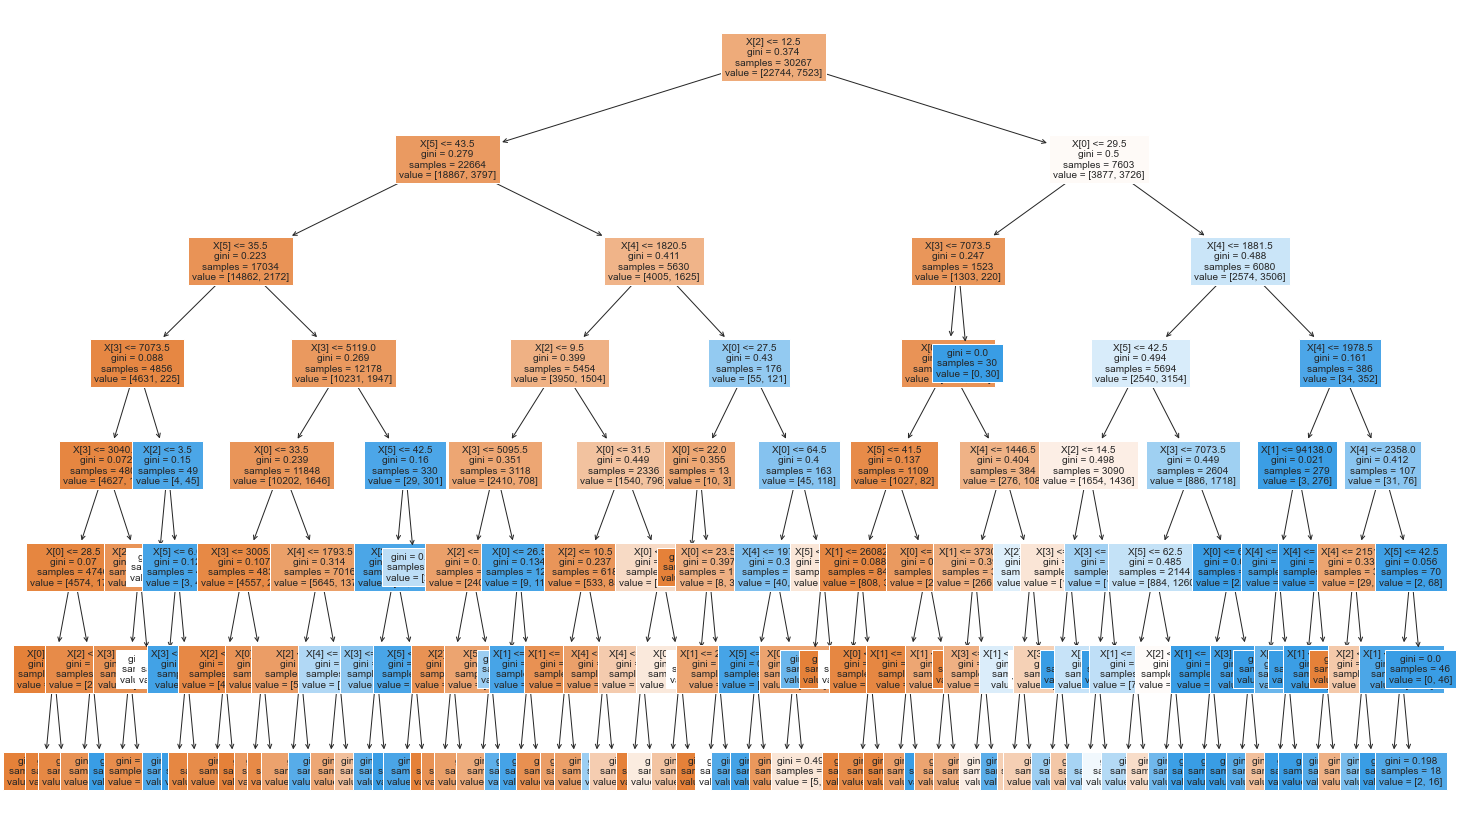

In [149]:
# Plotting Decision Tree with best param
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
tree.plot_tree(dtc_best_params, max_depth=9, filled=True,
fontsize=10)

#### Bagging Classifier

In [150]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()

In [151]:
bagging.fit(X_train,y_train)

BaggingClassifier()

In [152]:
bagging_pred=bagging.predict(X_test)

In [154]:
#### Accuracy score
print(f'training accuracy of the Bagging Classifier model is {round(bagging.score(X_train,y_train)*100,3)}%')
print(f'accuracy score of the Bagging Classifier model is {round(accuracy_score(y_test,bagging_pred)*100,3)}%')

training accuracy of the Bagging Classifier model is 97.968%
accuracy score of the Bagging Classifier model is 80.36%


In [155]:
#Confusion Matrix
conf_mat_bagging=confusion_matrix(y_test,bagging_pred)
conf_mat_bagging

array([[10217,  1012],
       [ 1916,  1763]], dtype=int64)

In [156]:
true_positive_bagging = conf_mat_bagging[0][0]
false_positive_bagging = conf_mat_bagging[0][1]
false_negative_bagging = conf_mat_bagging[1][0]
true_negative_bagging = conf_mat_bagging[1][1]
print('True Positive:',true_positive_bagging, '\nTrue Negative:',true_negative_bagging, '\nFalse Negative:',false_negative_bagging, '\nFalse Positive:',false_positive_bagging)

True Positive: 10217 
True Negative: 1763 
False Negative: 1916 
False Positive: 1012


In [157]:
#ROC-AUC score
y_train_pred_bagging_roc=bagging.predict_proba(X_train)

In [171]:
print(f'ROC-AUC score for training data for Bagging classifier model is {round(roc_auc_score(y_train,y_train_pred_bagging_roc[:,1])*100,3)}%')

ROC-AUC score for training data for Bagging classifier model is 99.871%


In [172]:
y_test_pred_bagging_roc=bagging.predict_proba(X_test)
print(f'ROC-AUC score for test data for Bagging classifier model is {round(roc_auc_score(y_test,y_test_pred_bagging_roc[:,1])*100,3)}%')

ROC-AUC score for test data for Bagging classifier model is 79.773%


In [173]:
## # Classification Report
class_report_bagging= classification_report(y_test, bagging_pred)
print(class_report_bagging)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87     11229
           1       0.64      0.48      0.55      3679

    accuracy                           0.80     14908
   macro avg       0.74      0.69      0.71     14908
weighted avg       0.79      0.80      0.79     14908



In [174]:
#Hyperparameter tuning
grid_params = {
'n_estimators' : [5, 10, 15],
'max_samples' : range(2, 10, 1),
'max_features' : range(2, 10, 3)
}

In [175]:
grid_search=GridSearchCV(estimator=bagging,param_grid=grid_params,verbose=2, n_jobs=-1, cv=3)

In [176]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': range(2, 10, 3),
                         'max_samples': range(2, 10),
                         'n_estimators': [5, 10, 15]},
             verbose=2)

In [177]:
grid_search.best_params_

{'max_features': 5, 'max_samples': 7, 'n_estimators': 15}

In [178]:
bagging_best_params=BaggingClassifier(max_features=5, max_samples=7, n_estimators=15)

In [180]:
bagging_best_params.fit(X_train,y_train)

BaggingClassifier(max_features=5, max_samples=7, n_estimators=15)

In [181]:
bagging_best_params_pred=bagging_best_params.predict(X_test)

In [182]:
#### Accuracy score
print(f'training accuracy of the Bagging Classifier model with best parameter is {round(bagging_best_params.score(X_train,y_train)*100,3)}%')
print(f'accuracy score of the Bagging Classifier model is {round(accuracy_score(y_test,bagging_best_params_pred)*100,3)}%')

training accuracy of the Bagging Classifier model with best parameter is 75.201%
accuracy score of the Bagging Classifier model is 75.396%


In [183]:
#Confusion Matrix
conf_mat_bagging_best_param=confusion_matrix(y_test,bagging_best_params_pred)
conf_mat_bagging_best_param

array([[11229,     0],
       [ 3668,    11]], dtype=int64)

In [184]:
#ROC-AUC score
y_train_pred_bagging_best_param_roc=bagging_best_params.predict_proba(X_train)

In [185]:
print(f'ROC-AUC score for training data for Bagging classifier model with best parameter is {round(roc_auc_score(y_train,y_train_pred_bagging_best_param_roc[:,1])*100,3)}%')

ROC-AUC score for training data for Bagging classifier model with best parameter is 70.545%


In [186]:
y_test_pred_bagging_best_param_roc=bagging_best_params.predict_proba(X_test)
print(f'ROC-AUC score for test data for Bagging classifier model with best parameter is {round(roc_auc_score(y_test,y_test_pred_bagging_best_param_roc[:,1])*100,3)}%')

ROC-AUC score for test data for Bagging classifier model with best parameter is 70.765%


In [187]:
## Classification Report
class_report_bagging_best_param= classification_report(y_test, bagging_best_params_pred)
print(class_report_bagging_best_param)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     11229
           1       1.00      0.00      0.01      3679

    accuracy                           0.75     14908
   macro avg       0.88      0.50      0.43     14908
weighted avg       0.81      0.75      0.65     14908



#### Random Forest Classifier

In [188]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [189]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [190]:
RFC_pred=RFC.predict(X_test)

In [193]:
#Accuracy score
print(f'training accuracy of the RFC model is {round(RFC.score(X_train,y_train)*100,3)}%')
print(f'accuracy score of the RFC model is {round(accuracy_score(y_test,RFC_pred)*100,3)}%')

training accuracy of the RFC model is 99.845%
accuracy score of the RFC model is 79.521%


In [194]:
#ROC-AUC score
y_train_pred_RFC_roc=RFC.predict_proba(X_train)
print(f'ROC-AUC score for training data for RFC model is {round(roc_auc_score(y_train,y_train_pred_RFC_roc[:,1])*100,3)}%')
y_test_pred_RFC_roc=RFC.predict_proba(X_test)
print(f'ROC-AUC score for test data for RFC model is {round(roc_auc_score(y_test,y_test_pred_RFC_roc[:,1])*100,3)}%')

ROC-AUC score for training data for RFC model is 99.998%
ROC-AUC score for test data for RFC model is 81.781%


In [195]:
#Confusion Matrix
conf_mat_RFC=confusion_matrix(y_test,RFC_pred)
conf_mat_RFC

array([[9936, 1293],
       [1760, 1919]], dtype=int64)

In [208]:
## Classification Report
class_report_RFC= classification_report(y_test, RFC_pred)
print(class_report_RFC)

              precision    recall  f1-score   support

           0       0.85      0.88      0.87     11229
           1       0.60      0.52      0.56      3679

    accuracy                           0.80     14908
   macro avg       0.72      0.70      0.71     14908
weighted avg       0.79      0.80      0.79     14908



#### Extra Trees Classifier

In [200]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()

In [201]:
ETC.fit(X_train,y_train)

ExtraTreesClassifier()

In [202]:
ETC_pred=ETC.predict(X_test)

In [203]:
#Accuracy score
print(f'training accuracy of the ETC model is {round(ETC.score(X_train,y_train)*100,3)}%')
print(f'accuracy score of the ETC model is {round(accuracy_score(y_test,ETC_pred)*100,3)}%')

training accuracy of the ETC model is 99.851%
accuracy score of the ETC model is 78.019%


In [204]:
#ROC-AUC score
y_train_pred_ETC_roc=ETC.predict_proba(X_train)
print(f'ROC-AUC score for training data for ETC model is {round(roc_auc_score(y_train,y_train_pred_ETC_roc[:,1])*100,3)}%')
y_test_pred_ETC_roc=ETC.predict_proba(X_test)
print(f'ROC-AUC score for test data for ETC model is {round(roc_auc_score(y_test,y_test_pred_ETC_roc[:,1])*100,3)}%')

ROC-AUC score for training data for ETC model is 99.999%
ROC-AUC score for test data for ETC model is 78.854%


In [205]:
#Confusion Matrix
conf_mat_ETC=confusion_matrix(y_test,ETC_pred)
conf_mat_ETC

array([[9740, 1489],
       [1788, 1891]], dtype=int64)

In [209]:
## Classification Report
class_report_ETC= classification_report(y_test, ETC_pred)
print(class_report_ETC)

              precision    recall  f1-score   support

           0       0.84      0.87      0.86     11229
           1       0.56      0.51      0.54      3679

    accuracy                           0.78     14908
   macro avg       0.70      0.69      0.70     14908
weighted avg       0.77      0.78      0.78     14908

